## Sentiment Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_sent = pd.read_pickle('corpus.pkl')
data_sent

,lyrics,song_name
a_reece,\n\n[Refrain]\nRolling up a 8th like every day...,paradise
nasty_c,\n\n[Hook: Nasty C]\nAm I ever gonna quit?\nHe...,hell_naw
stogie_t,"\n\n[Verse 1]\nRain trickling, window pane whi...",ptsd
yugen_blakrok,"\n\n[Intro]\nYeah, yeah, that's the one\nPlast...",picture_box


In [3]:
from textblob import TextBlob

Conducting a sentiment analysis whether the rappers views are polarizing or subjective

In [4]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [5]:
data_sent['polarity'] = data_sent['lyrics'].apply(pol)
data_sent['subjectivity'] = data_sent['lyrics'].apply(sub)

data_sent

,lyrics,song_name,polarity,subjectivity
a_reece,\n\n[Refrain]\nRolling up a 8th like every day...,paradise,0.074600,0.481463
nasty_c,\n\n[Hook: Nasty C]\nAm I ever gonna quit?\nHe...,hell_naw,-0.173326,0.570057
stogie_t,"\n\n[Verse 1]\nRain trickling, window pane whi...",ptsd,-0.180729,0.556354
yugen_blakrok,"\n\n[Intro]\nYeah, yeah, that's the one\nPlast...",picture_box,-0.044843,0.514035


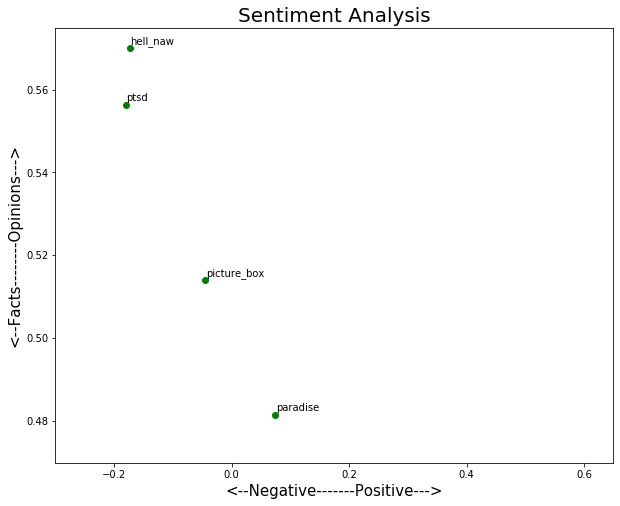

In [9]:
#Plotting these findings
plt.rcParams['figure.figsize']= 10,8

for index, song_name in enumerate(data_sent.index):
    x= data_sent.polarity.loc[song_name]
    y= data_sent.subjectivity.loc[song_name]
    plt.scatter(x,y, color='green')
    plt.text(x+.001, y+.001, data_sent['song_name'][index], fontsize=10)
    plt.xlim(-0.3,.65)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<--Negative-------Positive--->', fontsize=15)
plt.ylabel('<--Facts--------Opinions--->', fontsize=15)
plt.show();

In [10]:
data = pd.read_pickle('dtm_stop.pkl')
data

,acting,actor,adam,afford,afraid,age,ah,ahah,aint,ak,...,working,world,worlds,wrist,write,yea,yeah,young,youngin,youth
a_reece,1,0,0,6,0,2,0,0,3,0,...,1,0,0,0,0,0,2,0,0,0
nasty_c,0,0,1,0,0,1,1,1,2,0,...,0,0,0,1,1,1,1,1,2,1
stogie_t,0,0,0,0,1,0,0,0,2,1,...,0,1,0,0,0,0,0,0,0,0
yugen_blakrok,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,3,0,0,0


In [11]:
from gensim import matutils, models
import scipy.sparse

In [12]:
#To enable long format we transpose the data
tdm = data.transpose()
tdm

,a_reece,nasty_c,stogie_t,yugen_blakrok
acting,1,0,0,0
actor,0,0,0,1
adam,0,1,0,0
afford,6,0,0,0
afraid,0,0,1,0
...,...,...,...,...
yea,0,1,0,0
yeah,2,1,0,3
young,0,1,0,0
youngin,0,2,0,0


In [13]:
#putting the new tdm into a genism format, from dataframe to sparse matrix to genism corpus
sparse_counts =scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [14]:
import pickle

In [15]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
cv =pickle.load(open('cv_stop.pkl','rb'))
id2word = dict((v,k) for k, v in cv.vocabulary_.items())

In [20]:
#specifying these parameters
lda= models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=10000)
lda.print_topics()

[(0,
  '0.028*"turn" + 0.012*"cosmic" + 0.009*"heart" + 0.009*"lights" + 0.009*"peace" + 0.009*"sun" + 0.009*"inner" + 0.009*"shines" + 0.009*"dark" + 0.009*"firefly"'),
 (1,
  '0.038*"hell" + 0.038*"naw" + 0.023*"right" + 0.019*"shit" + 0.015*"nigga" + 0.014*"really" + 0.014*"bitch" + 0.012*"running" + 0.012*"fucking" + 0.012*"gonna"'),
 (2,
  '0.027*"pull" + 0.023*"life" + 0.017*"day" + 0.017*"time" + 0.017*"paradise" + 0.012*"leave" + 0.012*"store" + 0.012*"meeting" + 0.012*"afford" + 0.012*"soldiers"'),
 (3,
  '0.001*"verse" + 0.001*"stage" + 0.001*"thats" + 0.001*"say" + 0.001*"flow" + 0.001*"dead" + 0.001*"women" + 0.001*"day" + 0.001*"shit" + 0.001*"people"'),
 (4,
  '0.018*"dont" + 0.011*"cold" + 0.011*"medicine" + 0.011*"wars" + 0.011*"arm" + 0.009*"guns" + 0.009*"play" + 0.009*"pick" + 0.009*"god" + 0.009*"goes"')]